# Applications of Empirical Modeling

In our last notebook, we learned how to:

1. do an automatic curve fit of *any mathematical function* to data and find the best-fit curve parameters.
2. use the model to answer questions and make predictions.
3. be wary of making predictions since the model may not fit data outside the range used for the model. (For example, a model based on "past" data may not fit "future" data.)

In this notebook, we will:

1. practice this technique to various data sets.
2. apply a curve fit to a range of data.
3. modify a model.

In [3]:
import numpy as np #used for arrays and numerical functions
import pandas as pd #used for reading a data file
import matplotlib.pyplot as plt #used for graphing
from scipy.optimize import curve_fit #used for curve fitting
from io import StringIO #used to convert string to a dataframe

# Part 1: Practice

## Exercise 1 - Vostok Ice Core

This exercise comes from [The Physics Hypertextbook](https://physics.info/linear-regression/practice.shtml). Data is from the [Vostok - Isotope and Gas Data and Temperature Reconstruction](https://www.ncdc.noaa.gov/paleo-search/study/2453) by Petit, et. al. (1999).

    Petit, J.R., J. Jouzel, D. Raynaud, N.I. Barkov, J.M. Barnola, I. Basile, M. Bender, J. Chappellaz, J. Davis, G. Delaygue, M. Delmotte, V.M. Kotlyakov, M. Legrand, V. Lipenkov, C. Lorius, L. Pépin, C. Ritz, E. Saltzman, and M. Stievenard. 1999. Climate and atmospheric history of the past 420,000 years from the Vostok Ice Core, Antarctica. Nature 399:429-436.
    
From a deep ice core sampled in Antarctica, surface temperature, carbon dioxide, and dust could be measured as a function of time in the past. While other measurements were made as well (see the above reference), we will look at temperature and carbon dioxide. This [data set](https://raw.githubusercontent.com/atitus/math-modeling-2/main/unit-03/03-05-applications/vostok.txt) includes the columns:

1. Age of air in years before present.
2. Temperature anomaly (difference in temperature from the present) in degrees celsius.
3. Carbon dioxide concentration in parts per million.


In [2]:
# read the data file
df = pd.read_csv('https://raw.githubusercontent.com/atitus/math-modeling-2/main/unit-03/03-05-applications/vostok.txt', sep='\t')
df.head()

,Age of air (ybp),Temperature anomaly (deg. C),Carbon dioxide concentration (ppm)
0,2342,-1.21,284.700000
1,2374,-1.44,284.303333
2,2418,-0.73,283.906667
3,2460,-0.63,283.510000
4,2501,0.30,283.113333


Here is a graph of temperature anomaly vs. carbon dioxide concentration.

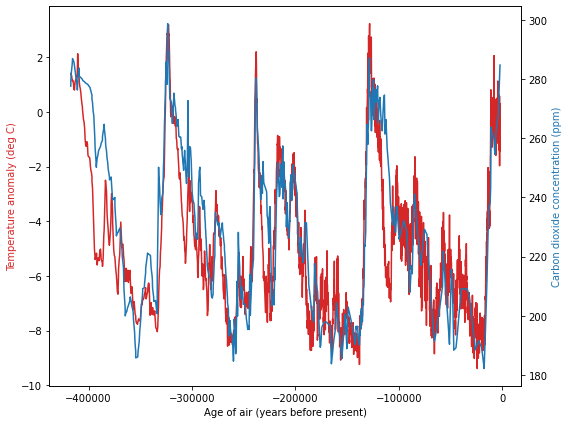

In [4]:
# define arrays for the data
xdata = -df['Age of air (ybp)'] #multiply by -1
ydata1 = df['Temperature anomaly (deg. C)']
ydata2 = df['Carbon dioxide concentration (ppm)']

fig, ax1 = plt.subplots(figsize=(8,6))

fig.title=('Temperature anomaly and carbon dioxide concentration as a function of time')
color = 'tab:red'
ax1.set_xlabel('Age of air (years before present)')

ax1.set_ylabel("Temperature anomaly (deg C)", color=color)
ax1.plot(xdata, ydata1, color=color)
#ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # create a second axis that shares attributes of the first axis

color = 'tab:blue'
ax2.set_ylabel('Carbon dioxide concentration (ppm)', color=color)
ax2.plot(xdata, ydata2, color=color)
#ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

It seems that temperature anomaly and carbon dioxide concentration might be related. Plot temperature anomaly vs. carbon dioxide concentration.

The data seems linear, so let's do a linear fit of the form $y=ax + b$. To verify your fit, you should find best-fit parameters to be:

$a=0.0908$

$b=-25.2349$

Here's [more recent data for carbon dioxide concentration](https://www.eea.europa.eu/data-and-maps/daviz/atmospheric-concentration-of-carbon-dioxide-5). You will need to change the "pollutant" to carbon dioxide (CO<sub>2</sub>).

Also, here's [more recent data for temperature anomaly](https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.txt). Note the column for annual mean (Jan. - Dec.) and that the unit is 0.01 degrees celsius. Thus, divide by 100 to get degrees celsius.

Use your model and/or the data to answer the following questions:

1. What is the unit of the constant $a$?

2. What is the unit of the constant $b$?

3. How many years ago was the most recent measurement of temperature anomaly and carbon dioxide concentration from the Vostok ice core?

4. In 1981, the carbon dioxide concentration was 340 ppm. What does your model predict would be the temperature anomaly in 1981 and what is the measured temperature anomaly in 1981?

5. In 2018, the carbon dioxide concentration was 408 ppm. What does your model predict would be the temperature anomaly in 2018 and what is the measured temperature anomaly in 2018?

6. Give a reason why the model may not be able to closely predice recent temperature anomalies?

7. Just because the model may not predict recent temperature anomalies, should we completely ignore the relationship between carbon dioxide concentration and global temperature anomaly and not worry at all about the increase in global carbon emissions?

## Exercise 2 - Transmission of Light by Glass: What should you do if  `curve_fit` fails?

Glass transmits visible light very well. But it blocks most infrared and ultraviolet light. Data for the transmission of light vs wavelength for a particular glass is in the file [transmission-glass.txt](https://raw.githubusercontent.com/atitus/math-modeling-2/main/unit-03/03-05-applications/transmission-glass.txt). ([source](http://nvlpubs.nist.gov/nistpubs/jres/38/jresv38n6p601_A1b.pdf))

Try to fit a Gaussian model to the data using:

$$y=ae^{\left(-\frac{1}{2}\left(\frac{x-b}{c}\right)^2\right)}$$

and try to find the best-fit parameters `a`, `b`, and `c`. You will notice that `curve_fit()` fails. 

The `curve_fit()` function adjusts the fit parameters until it minimizes the sum of the squares of the residuals. It starts with the initial guesses for the parameters listed in the line:

```python
guess=[1,1,1]
```

Note that there is a value for each parameter. So in this case, the initial guesses are $a=1$, $b=1$, and $c=1$. But the `curve_fit()` function fails if the initial guesses are far from the best-fit values. When this happens, change the initial guesses. You will have to make them much larger or smaller, and understanding how the parameters affects the function is important for determining a reasonable guess.

In this example, the parameter `a` is the peak of the gaussian which is close to 100. The parameter `b` is the mean which is around 530. And `c` is related to the width of the peak (or variance) which is around 100. Try using these initial values.

Adjust your `guess` for the fit parameters, and find the best-fit parameters `a`, `b`, and `c`.

## Exercise 3 - Kepler's Second Law

Kepler found a relationship between the period of a planet's orbit (in Earth years) and the semi-major axis (kinda like the radius, for a circular orbit) of the planet's orbit (in astronomical units, AU; 1 AU is the semi-major axis of Earth's orbit). Data for the 8 planets is in the file [planets.txt](https://raw.githubusercontent.com/atitus/math-modeling-2/main/unit-03/03-05-applications/planets.txt).

1. Plot the period vs. semimajor axis of the planet's orbit.
2. Fit a power law: 
  $$y = Ax^n$$
  and find the best-fit parameters.
3. There are [five dwarf planets](https://en.wikipedia.org/wiki/Dwarf_planet). 
  1. Use your model to **predict** the period of each of the dwarf planets' orbits using the semimajor axis of their orbits.
  2. Compare your prediction to the actual period of each dwarf planet. Make a table (in Markdown) of your prediction for the period and the actual period of the dwarf planets.

## Exercise 4 - Allometry

In biological systems, emperical models are sometimes discovered that mathematically relate one biological (often anatomical) measurement with another. **Allometry** is the general study of emperical relationships in biological systems. Typically there are no theoretical models to predict such a relationship. Therefore, allometric relationships are **emperical models**.

This 2015 paper by Jean Gayon, [History of the Concept of Allometry](https://academic.oup.com/icb/article/40/5/748/157095), describes the history of the field of allometry and especially the work of pioneers Huxley and Teissier.

In this excellent summary of the field of allometry, [Allometry: The Study of Biological Scaling](https://www.nature.com/scitable/knowledge/library/allometry-the-study-of-biological-scaling-13228439/), the author states:

"Allometry, in its broadest sense, describes how the characteristics of living creatures change with size. The term originally referred to the scaling relationship between the size of a body part and the size of the body as a whole, as both grow during development. However, more recently the meaning of the term allometry has been modified and expanded to refer to biological scaling relationships in general, be it for morphological traits (e.g., the relationship between brain size and body size among adult humans), physiological traits (e.g., the relationship between metabolic rate and body size among mammal species) or ecological traits (e.g., the relationship between wing size and flight performance in birds). Indeed, allometric relationships can be described for almost any co-varying biological measurements, resulting in broad usage of the term. However, a unifying theme is that allometry describes how traits or processes scale with one another. The study of allometry concerns the functional mechanisms that generate these scaling relationship, how they impact ecology, and how they respond to and influence evolution."

### Fiddler Crab

A [fiddler crab](https://scaquarium.org/our-animals/sand-fiddler-crab/) has one very large claw and one small claw. (The image is from [the SC Aquarium](https://scaquarium.org/our-animals/sand-fiddler-crab/).)

![](https://raw.githubusercontent.com/atitus/math-modeling-2/main/unit-03/03-05-applications/fiddler-crab.jpg)

The file [fiddler-crab.txt](https://raw.githubusercontent.com/atitus/math-modeling-2/main/unit-03/03-05-applications/fiddler-crab.txt) has data for the length of its claw in mm and diameter of the crab in mm. ([data source](https://www.futurelearn.com/courses/maths-power-laws/0/steps/12170))

**Graph the length of its claw in mm vs. the diameter of the crab in mm.**

The relationship is not linear. **Which grows faster, the claw length or the crab's body?**

**Find an emperical model that describes the length of the crab's claw as a function of the crab's diameter.** Note that the model must go through the point $(0,0)$ because when a crab is young, its diameter is nearly zero and its claw length is nearly zero. Then, as it grows, its diameter and its claw length increase.

Therefore, try a power function:

$$y = a x^n$$

Suppose you are walking on the beach and find a claw that was tragically separated from the crab. (Don't worry, they can [evidently grow another one on the other side after their next molt](https://en.wikipedia.org/wiki/Fiddler_crab).) The length of the claw is 4 mm. **What was the width of the crab that lost the claw?**

# Part 2: Apply a Curve Fit to a Range of Data

The cell below contains data for the total number of COVID-19 cases at HPU reported on each day after Aug. 21, 2020. We will define Aug. 21, 2020, as day 0.

The code fits and plots an exponential model of the form:

$$y = Ae^{rx}$$

where $y$ represents the number of cases and $x$ represents days since Aug. 21.

**First, run the program and view the graph.**

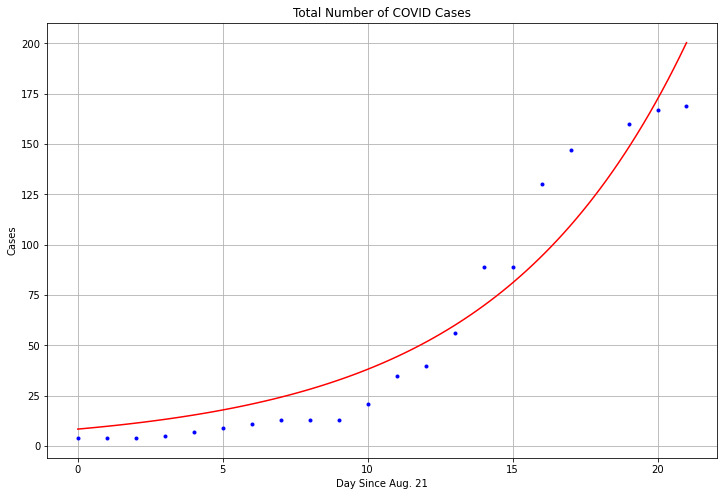

The curve fit parameters are:  8.43996232928684 0.1508044065709369


In [4]:
#define data
#The columns are: Day	Total Cases
data = StringIO("""x	y
0	4
1	4
2	4
3	5
4	7
5	9
6	11
7	13
8	13
9	13
10	21
11	35
12	40
13	56
14	89
15	89
16	130
17	147
19	160
20	167
21	169
""")

# convert data to dataframe
df = pd.read_csv(data, sep ="\t")

# define arrays for the data
xdata = df['x']
ydata = df['y']

# define the model function; this function returns y(x) for a given x and fit parameters
model = lambda x,A,r: A*np.exp(r*x)

# Find best fit parameters
guess=[1,1] # this is the initial guess for the fit parameters
params, covariance = curve_fit(model, xdata, ydata, p0=guess)

# calculate points for the model
xmodel = np.linspace(0,21,100)
ymodel = model(xmodel,*params)

# create graph
fig = plt.figure(figsize=(12,8))
plt.plot(xdata,ydata,'.b') # data
plt.plot(xmodel,ymodel,'-r') # best fit model
plt.grid()
plt.title("Total Number of COVID Cases")
plt.ylabel("Cases")
plt.xlabel("Day Since Aug. 21")
plt.show()

#results
print("The curve fit parameters are: ",*params)


Note that the exponential function doesn't fit the data very well. However, it might fit the data between Day 0 and Day 13, which is a total of 14 data points. To create lists for the first 14 data points, we will use:

```
xdata2 = xdata[0:14]
ydata2 = ydata[0:14]
```

Each list *include* index 0 and *excludes* index 14. Thus, the data includes index 0 through index 13.

In [5]:
xdata2 = xdata[0:14]
ydata2 = ydata[0:14]

Now, we will use only thse points for the curve fit and will plot it with the original data. Note that the code below uses `xdata2` and `ydata2` for the curve fit.

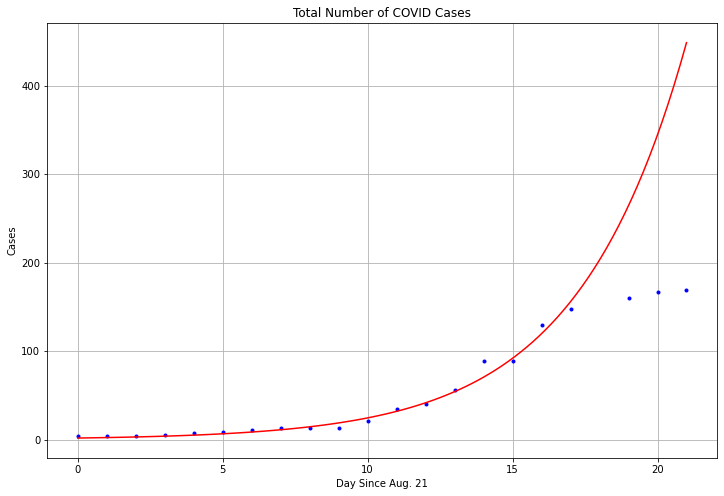

The curve fit parameters are:  1.7444645403009305 0.2642591101553074


In [6]:
# Find best fit parameters
guess=[1,1] # this is the initial guess for the fit parameters
params, covariance = curve_fit(model, xdata2, ydata2, p0=guess)

# calculate points for the model
xmodel = np.linspace(0,21,100)
ymodel = model(xmodel,*params)

# create graph
fig = plt.figure(figsize=(12,8))
plt.plot(xdata,ydata,'.b') # data
plt.plot(xmodel,ymodel,'-r') # best fit model
plt.grid()
plt.title("Total Number of COVID Cases")
plt.ylabel("Cases")
plt.xlabel("Day Since Aug. 21")
plt.show()

#results
print("The curve fit parameters are: ",*params)


### Entire Program

Here's the entire program in one cell.

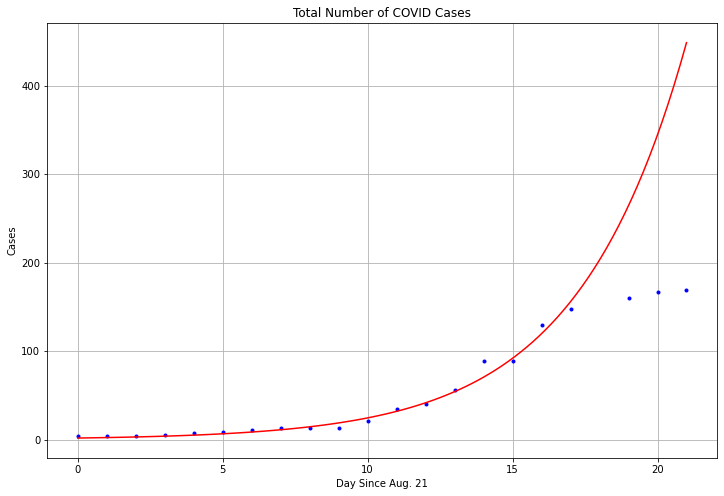

The curve fit parameters are:  1.7444645403009305 0.2642591101553074


In [7]:
#define data
#The columns are: Day	Total Cases
data = StringIO("""x	y
0	4
1	4
2	4
3	5
4	7
5	9
6	11
7	13
8	13
9	13
10	21
11	35
12	40
13	56
14	89
15	89
16	130
17	147
19	160
20	167
21	169
""")

# convert data to dataframe
df = pd.read_csv(data, sep ="\t")

# define arrays for the data
xdata = df['x']
ydata = df['y']

# define arrays for index 0 through index 13.
xdata2 = xdata[0:14]
ydata2 = ydata[0:14]

# define the model function; this function returns y(x) for a given x and fit parameters
model = lambda x,A,r: A*np.exp(r*x)

# Find best fit parameters
guess=[1,1] # this is the initial guess for the fit parameters
params, covariance = curve_fit(model, xdata2, ydata2, p0=guess)

# calculate points for the model
xmodel = np.linspace(0,21,100)
ymodel = model(xmodel,*params)

# create graph
fig = plt.figure(figsize=(12,8))
plt.plot(xdata,ydata,'.b') # data
plt.plot(xmodel,ymodel,'-r') # best fit model
plt.grid()
plt.title("Total Number of COVID Cases")
plt.ylabel("Cases")
plt.xlabel("Day Since Aug. 21")
plt.show()

#results
print("The curve fit parameters are: ",*params)


**On approximately what day does the data start to deviate from the exponential model?**

## Part 3: Improving a Model

While the COVID-19 data during the first 13 days fits an exponential growth model, the data starts to flatten out at approximately day 17. So let's fit a logistic function of the form:

$$y = \frac{L}{1+e^{-k(x-x_0)}}$$

where $L$, $k$, and $x_0$ are fit parameters.

**Fit a logistic function to the data and find the best-fit parameters.**

## Example: emperical model for NBA draft

Aamiya and Blake sent me this article on [NBA Draft All-Star Correlations](https://www.pdg-analytics.com/articles/nba-draft-all-star-correlations). In the article, the authors fit a mathematical function to a graph of the probability of drafting a player who becomes an All-Star.

1. What mathematical function do they first fit to the data?
2. What do they notice about the data and how do they change their model to better fit the data?